In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [3]:
img = cv2.imread("watch.jpg", cv2.IMREAD_GRAYSCALE)  #cv2.read(image file, parms)   彩色为1，灰度为0，不变为-1


In [ ]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

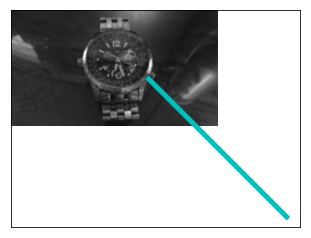

In [8]:
plt.imshow(img, cmap="gray", interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([200,300,400],[100,200,300],'c', linewidth=5)
plt.show()

In [ ]:

cap = cv2.VideoCapture(0)  # 为0的话是电脑的第一个摄像头
 
while(True):
    ret, frame = cap.read()
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):     #按q退出
        break

cap.release()
cv2.destroyAllWindows()

In [3]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')    #保存视频
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))  

while(True):
    ret, frame = cap.read()
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out.write(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

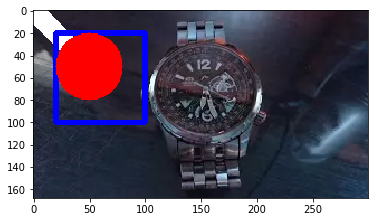

In [5]:
import numpy as np
import cv2

img = cv2.imread("watch.jpg")
plt.imshow(img)
cv2.line(img, (0,0), (40,40), (255,255,255), 15 )   #图片，开始坐标，结束坐标，颜色（bgr），线条粗细。
cv2.rectangle(img, (20,20), (100,100), (0,0,255), 4)     #图像，左上角坐标，右下角坐标，颜色和线条粗细
cv2.circle(img, (50,50), 30, (255,0,0), -1 )   # 图像/帧，圆心，半径，颜色和粗细  粗细为-1，表示将圆填充
plt.imshow(img)

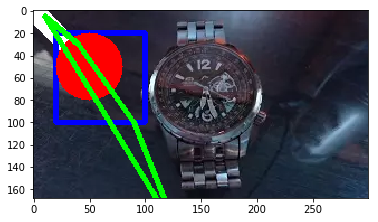

In [9]:
#绘制任意形状
pts = np.array([[10,5], [40, 30], [90, 100], [130, 200]], np.int32)  
cv2.polylines(img, [pts], True, (0,255,0), 4) #绘制的对象，坐标，我们应该连接终止的和起始点，颜色和粗细
plt.imshow(img)

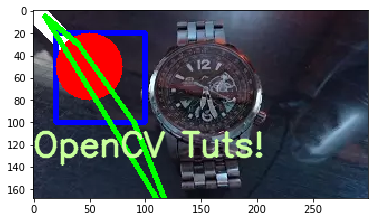

In [10]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV Tuts!',(0,130), font, 1, (200,255,155), 2, cv2.LINE_AA)  #加入文字
plt.imshow(img)

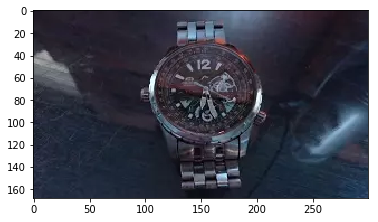

In [18]:
import cv2
import numpy as np

img = cv2.imread("watch.jpg", 1)
plt.imshow(img)

In [19]:
print(img.shape)
print(img.size)
print(img.dtype)

(168, 300, 3)
151200
uint8


# 图像操作

In [20]:
print(img[4][4])    #每一个像素值是可以编辑的

[32 27 37]


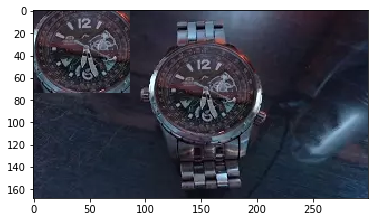

In [21]:
watch_face = img[37:111,107:194]
img[0:74,0:87] = watch_face

plt.imshow(img)

# 图像算术和逻辑运算

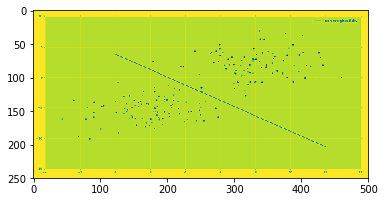

In [12]:
img1 = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("image2.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img2)
add = img2+img1
#plt.imshow(add)

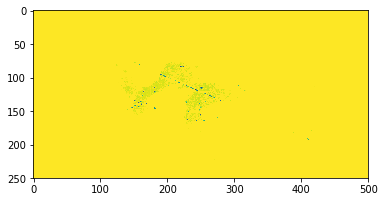

In [25]:
add = cv2.add(img1,img2)
plt.imshow(add)

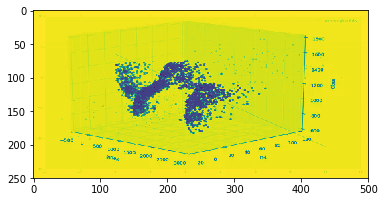

In [26]:
add = cv2.addWeighted(img1,0.8, img2, 0.2, 0 )   #参数是第一个图像，权重，第二个图像，权重，然后是伽马值，这是一个光的测量值
plt.imshow(add)

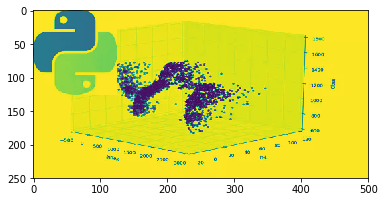

In [34]:
img1 = cv2.imread("image1.jpg", 0)
img2 = cv2.imread("python_logo.jpg", 0)


w = img2.shape[0]
h = img2.shape[1]

ret , mask = cv2.threshold(img2, 220, 225 ,cv2.THRESH_BINARY_INV) #第一个原图像，第二个进行分类的阈值，第三个是高于（低于）阈值时赋予的新值，第四个是一个方法选择参数 黑白二值反转
mask = cv2.bitwise_not(mask)
img1[0:w, 0:h] = img2
plt.imshow(img1)

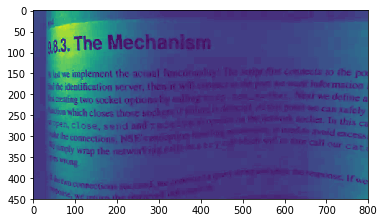

In [19]:
img = cv2.imread("bookpage.jpg", 0)
plt.imshow(img)

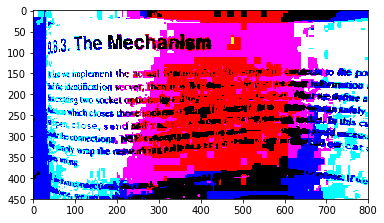

In [14]:
retval, img = cv2.threshold(img, 12 , 255, cv2.THRESH_BINARY)
plt.imshow(img)

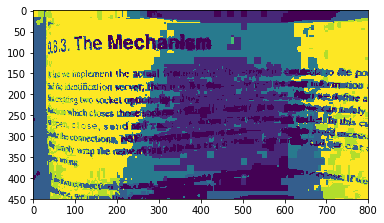

In [15]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

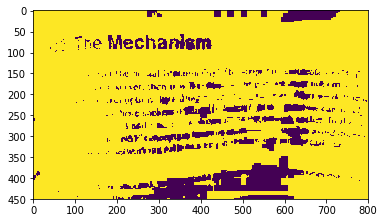

In [16]:
retval, threshold = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
plt.imshow(threshold)

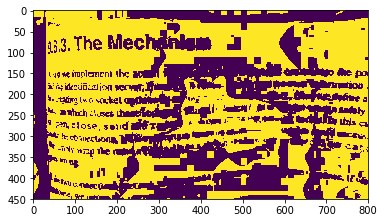

In [20]:
th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1) #自适应阈值
plt.imshow(th)

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([200,200,200])
    upper_red = np.array([255,255,255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 2:
        break

cv2.destroyAllWindows()
cap.release()

In [1]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([0,0,200])
    upper_red = np.array([0,0,250])
    
    #mask = cv2.inRange(hsv, lower_red, upper_red)
    #res = cv2.bitwise_and(frame,frame, mask= mask)

    laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('laplacian',laplacian)
    cv2.imshow('sobelx',sobelx)
    cv2.imshow('sobely',sobely)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

NameError: name 'mask' is not defined

In [3]:
dark_red  = np.uint8([[[2,250,250]]])
dark_red = cv2.cvtColor(dark_red,cv2.COLOR_BGR2HSV)
print(dark_red)

[[[  0   0 250]]]


# 模板匹配

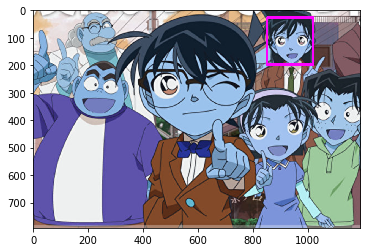

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread("kenan.png",1)
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread("lan.png",0)
#plt.imshow(img2)
w,h = img2.shape[::-1]

res = cv2.matchTemplate(gray_img1 ,img2 , cv2.TM_CCOEFF_NORMED) 
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img1, pt, (pt[0] + w, pt[1] + h), (255,0,255), 2)
plt.imshow(img1)


# GrabCut 前景提取

In [18]:
import numpy as np
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

In [ ]:
while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [6]:
import numpy as np
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')


cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
        smile = smile_cascade.detectMultiScale(roi_gray,
            scaleFactor= 1.16,
            minNeighbors=35,
            minSize=(25, 25),
            flags=cv2.CASCADE_SCALE_IMAGE)
        for (x2, y2, w2, h2) in smile:
            cv2.rectangle(roi_color, (x2, y2), (x2+w2, y2+h2), (0, 0, 255), 2)
            cv2.putText(img,'Smile',(x,y-7), 3, 1.2, (0, 255, 0), 2, cv2.LINE_AA)

            
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 